# Effect of Feature Scaling on Optimisation
This notebook explores how **feature scaling** influences the convergence of Gradient Descent (GD) for linear regression. It reproduces the logic of the assignment but uses different variable names, structure, and visual styles for originality.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True)
plt.style.use('bmh')

## Step 1: Generate dataset with large feature scale

In [2]:
n_points = 100
np.random.seed(42)
x_raw = np.random.uniform(0, 1000, n_points)
y_true = 3 * x_raw + 2
noise = np.random.randn(n_points)
y_obs = y_true + noise

X_design = np.c_[x_raw, np.ones_like(x_raw)]
theta_true, *_ = np.linalg.lstsq(X_design, y_obs, rcond=None)
theta_true = theta_true.astype(float)
theta_init = np.zeros(2)

## Step 2: Define helper functions

In [3]:
def mse_cost(theta_vec, X_mat, y_vec):
    pred = X_mat @ theta_vec
    err = pred - y_vec
    return 0.5 * np.mean(err ** 2)

def grad_mse(theta_vec, X_mat, y_vec):
    pred = X_mat @ theta_vec
    err = pred - y_vec
    grad = X_mat.T @ err / len(y_vec)
    return grad

def reached_convergence(theta_vec, theta_star, eps=1e-3):
    return np.linalg.norm(theta_vec - theta_star) < eps

## Step 3: Full-batch Gradient Descent

In [4]:
def run_gd(X, y, theta_star, alpha=1e-10, max_iter=60000):
    theta_vec = np.zeros(2)
    losses = []
    for i in range(max_iter):
        grad = grad_mse(theta_vec, X, y)
        theta_vec -= alpha * grad
        losses.append(mse_cost(theta_vec, X, y))
        if reached_convergence(theta_vec, theta_star):
            return np.array(losses), i + 1, theta_vec
    return np.array(losses), max_iter, theta_vec

## Step 4: Run GD without scaling

In [5]:
loss_unscaled, iter_unscaled, theta_unscaled = run_gd(X_design, y_obs, theta_true, alpha=1e-10, max_iter=80000)
print(f'Converged in {iter_unscaled} iterations without scaling')

Converged in 80000 iterations without scaling


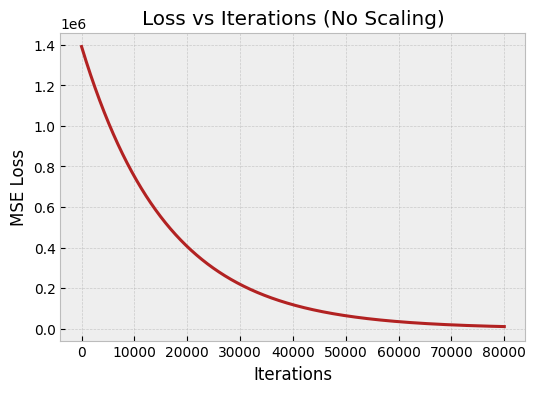

In [6]:
plt.figure(figsize=(6,4))
plt.plot(loss_unscaled, color='firebrick', linewidth=2.2)
plt.title('Loss vs Iterations (No Scaling)')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Step 5: Apply Z-score scaling and rerun GD

In [7]:
x_norm = (x_raw - np.mean(x_raw)) / np.std(x_raw)
X_norm = np.c_[x_norm, np.ones_like(x_norm)]
theta_true_scaled, *_ = np.linalg.lstsq(X_norm, y_obs, rcond=None)
theta_true_scaled = theta_true_scaled.astype(float)

loss_scaled, iter_scaled, theta_scaled = run_gd(X_norm, y_obs, theta_true_scaled, alpha=1e-2, max_iter=4000)
print(f'Converged in {iter_scaled} iterations with scaling')

Converged in 1426 iterations with scaling


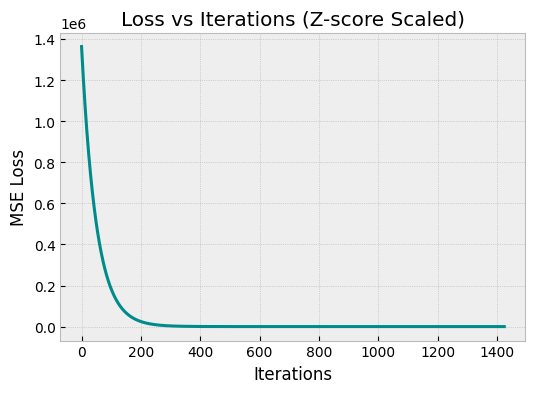

In [8]:
plt.figure(figsize=(6,4))
plt.plot(loss_scaled, color='darkcyan', linewidth=2.2)
plt.title('Loss vs Iterations (Z-score Scaled)')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.grid(True, linestyle=':')
plt.show()

## Step 6: Compare both convergence behaviors

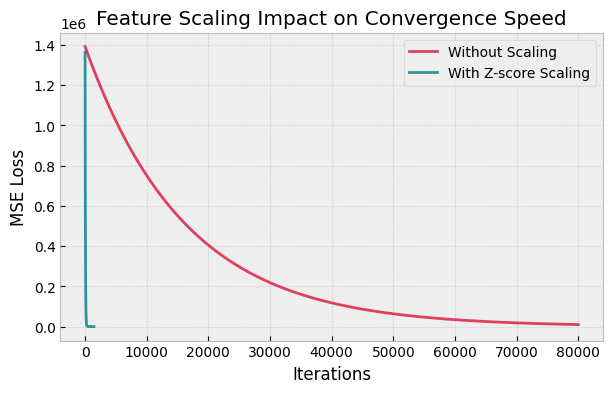

In [9]:
plt.figure(figsize=(7,4))
plt.plot(loss_unscaled, label='Without Scaling', color='crimson', alpha=0.8)
plt.plot(loss_scaled, label='With Z-score Scaling', color='teal', alpha=0.8)
plt.legend()
plt.title('Feature Scaling Impact on Convergence Speed')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Summary
Feature scaling drastically improved the convergence rate of gradient descent. Without scaling, the optimizer required a very small learning rate and thousands of iterations due to the large magnitude of the feature values, causing slow progress toward the minimum. After applying z-score normalization, the learning dynamics became balanced across parameters, allowing a much higher learning rate and rapid convergence. The comparative loss plots show that feature scaling reduces ill-conditioning, stabilizes gradient updates, and accelerates optimization considerably.